# Exploratory Data Analysis on Anime Dataset

This notebook performs a comprehensive Exploratory Data Analysis (EDA) on the Anime dataset. The analysis aims to understand the dataset's structure, clean the data, and visualize key patterns and relationships. The following steps are undertaken in this notebook:

1. **Data Loading and Initial Inspection:**
   - The dataset is loaded from a CSV file into a Pandas DataFrame.
   - The first few rows of the dataset are displayed to get an initial sense of the data.
   - Basic information about the dataset, including data types and non-null counts, is provided.
   - Missing values are identified and counted.

2. **Statistical Summary:**
   - Summary statistics for numerical columns are generated to understand the central tendency and dispersion of the data.

3. **Column-Specific Analysis:**
   - **Episodes Column:** Non-numeric values are identified and replaced with NaN. The distribution of episodes is visualized using a histogram.
   - **Members Column:** The distribution of the number of members is visualized to understand the audience size for different anime.
   - **Rating Column:** The distribution of ratings is visualized to understand the spread and central tendency.
   - **Type Column:** A count plot is used to show the distribution of different anime types (e.g., TV, Movie, OVA).
   - **Genre Column:** The genres are split and counted to identify the most common genres, which are then visualized in a bar plot.
   

Throughout the notebook, visualizations are created using Matplotlib and Seaborn to provide clear and informative insights into the dataset. The analysis helps in identifying patterns, trends, and potential areas for further investigation.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'anime.csv'
anime_df = pd.read_csv(file_path)

# Display first few rows
anime_df.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [2]:
# Display dataset info
anime_df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB


In [3]:
# Check for missing values
anime_df.isnull().sum()

anime_id      0
name          0
genre        62
type         25
episodes      0
rating      230
members       0
dtype: int64

In [4]:
# Summary statistics for numerical columns
anime_df.describe()

,anime_id,rating,members
count,12294.000000,12064.000000,1.229400e+04
mean,14058.221653,6.473902,1.807134e+04
std,11455.294701,1.026746,5.482068e+04
min,1.000000,1.670000,5.000000e+00
25%,3484.250000,5.880000,2.250000e+02
50%,10260.500000,6.570000,1.550000e+03
75%,24794.500000,7.180000,9.437000e+03
max,34527.000000,10.000000,1.013917e+06


['1' '64' '51' '24' '10' '148' '110' '13' '201' '25' '22' '75' '4' '26'
 '12' '27' '43' '74' '37' '2' '11' '99' 'Unknown' '39' '101' '47' '50'
 '62' '33' '112' '23' '3' '94' '6' '8' '14' '7' '40' '15' '203' '77' '291'
 '120' '102' '96' '38' '79' '175' '103' '70' '153' '45' '5' '21' '63' '52'
 '28' '145' '36' '69' '60' '178' '114' '35' '61' '34' '109' '20' '9' '49'
 '366' '97' '48' '78' '358' '155' '104' '113' '54' '167' '161' '42' '142'
 '31' '373' '220' '46' '195' '17' '1787' '73' '147' '127' '16' '19' '98'
 '150' '76' '53' '124' '29' '115' '224' '44' '58' '93' '154' '92' '67'
 '172' '86' '30' '276' '59' '72' '330' '41' '105' '128' '137' '56' '55'
 '65' '243' '193' '18' '191' '180' '91' '192' '66' '182' '32' '164' '100'
 '296' '694' '95' '68' '117' '151' '130' '87' '170' '119' '84' '108' '156'
 '140' '331' '305' '300' '510' '200' '88' '1471' '526' '143' '726' '136'
 '1818' '237' '1428' '365' '163' '283' '71' '260' '199' '225' '312' '240'
 '1306' '1565' '773' '1274' '90' '475' '263' '8

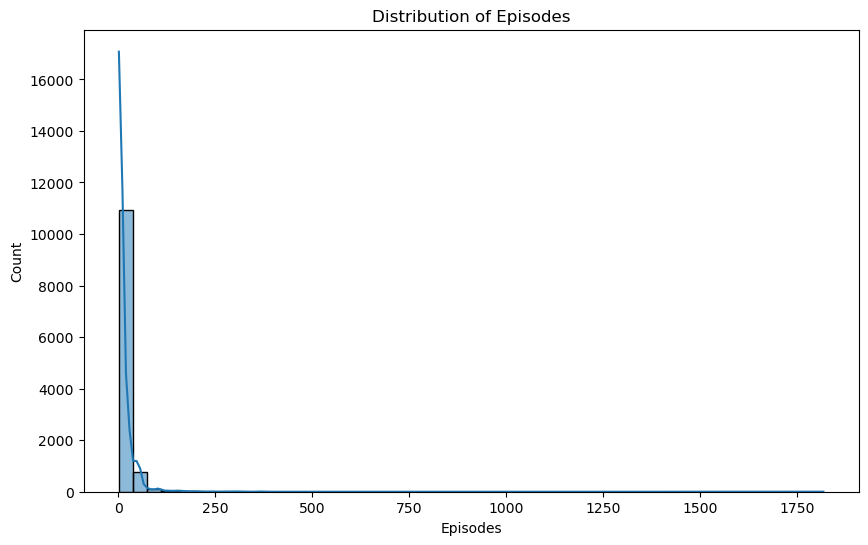

In [5]:
# Check unique values in episodes
print(anime_df['episodes'].unique())

# Replace 'Unknown' or non-numeric entries with NaN
anime_df['episodes'] = pd.to_numeric(anime_df['episodes'], errors='coerce')

# Plot distribution of episodes
plt.figure(figsize=(10, 6))
sns.histplot(anime_df['episodes'].dropna(), bins=50, kde=True)
plt.title('Distribution of Episodes')
plt.xlabel('Episodes')
plt.show()

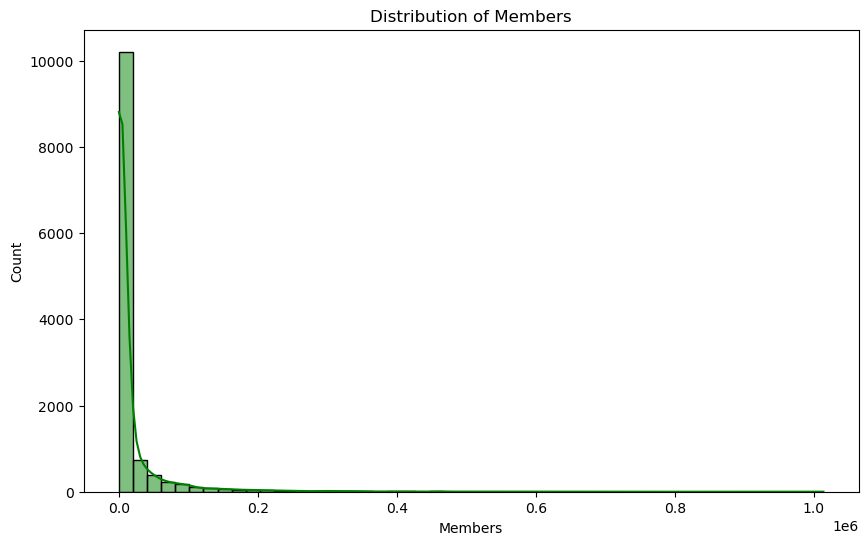

In [6]:
# Distribution of members
plt.figure(figsize=(10, 6))
sns.histplot(anime_df['members'], bins=50, kde=True, color='green')
plt.title('Distribution of Members')
plt.xlabel('Members')
plt.show()

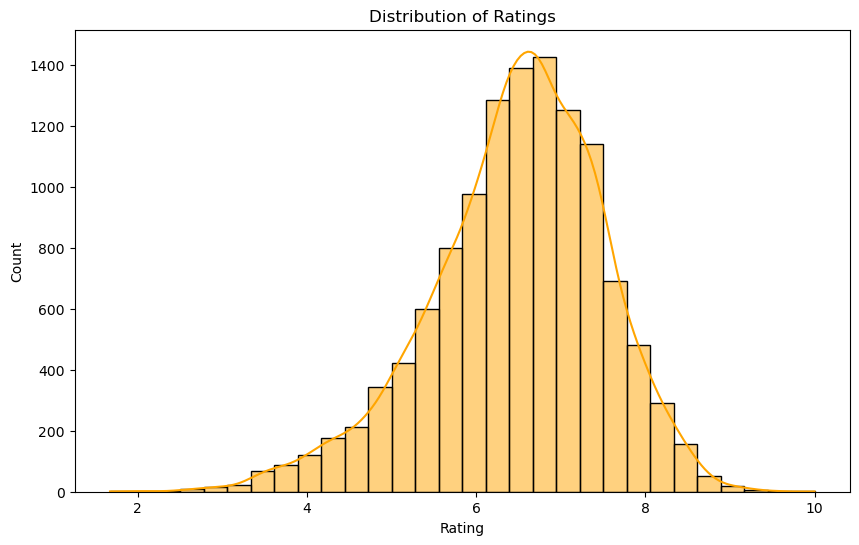

In [7]:
# Distribution of ratings
plt.figure(figsize=(10, 6))
sns.histplot(anime_df['rating'].dropna(), bins=30, kde=True, color='orange')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.show()

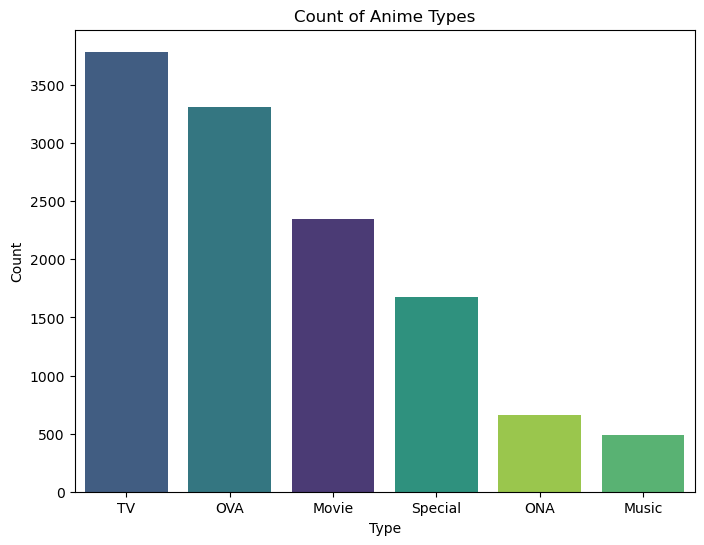

In [8]:
# Count plot for type
plt.figure(figsize=(8, 6))
sns.countplot(x='type', data=anime_df, hue='type', palette='viridis', order=anime_df['type'].value_counts().index, dodge=False, legend=False)
plt.title('Count of Anime Types')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

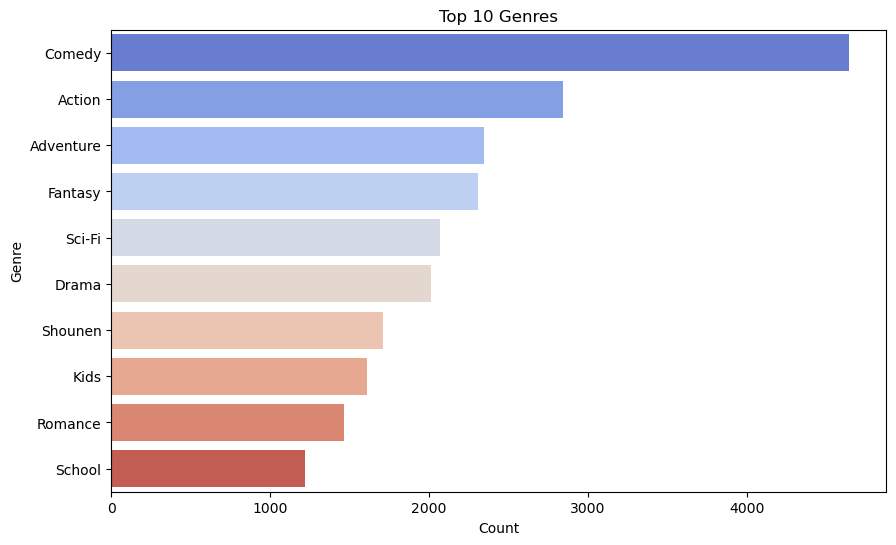

In [9]:
# Split genres and count occurrences
genre_series = anime_df['genre'].dropna().str.split(', ').explode()
top_genres = genre_series.value_counts().head(10)

# Plot the top genres
plt.figure(figsize=(10, 6))
sns.barplot(x=top_genres.values, y=top_genres.index, hue=top_genres.index, palette='coolwarm', dodge=False, legend=False)
plt.title('Top 10 Genres')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()